In [5]:
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, EfficientSU2
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.primitives import Sampler
import time
from qiskit_machine_learning.algorithms.classifiers import VQC
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from IPython.display import clear_output
#import numpy 
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit
from sklearn.metrics import mean_squared_error, f1_score

In [26]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
%matplotlib inline

house = pd.read_csv('Housing.csv')

house['airconditioning'] = house['airconditioning'].map({'yes': 1, 'no': 0})
house['mainroad'] = house['mainroad'].map({'yes': 1, 'no': 0})
house['guestroom'] = house['guestroom'].map({'yes': 1, 'no': 0})
house['basement'] = house['basement'].map({'yes': 1, 'no': 0})
house['hotwaterheating'] = house['hotwaterheating'].map({'yes': 1, 'no': 0})
house['prefarea'] = house['prefarea'].map({'yes': 1, 'no': 0})
house['furnishingstatus'] = house['furnishingstatus'].map({'furnished': 2, 'unfurnished': 0, 'semi-furnished': 1})
house

lab = []
for i in range(len(house['price'])):
    if house['price'][i] <= 4000000:
        lab.append(0)
    else :
        lab.append(1)

house['label'] = np.array(lab)
#house = house.sample(frac = 1) #shuffle rows
house


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,label
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2,0


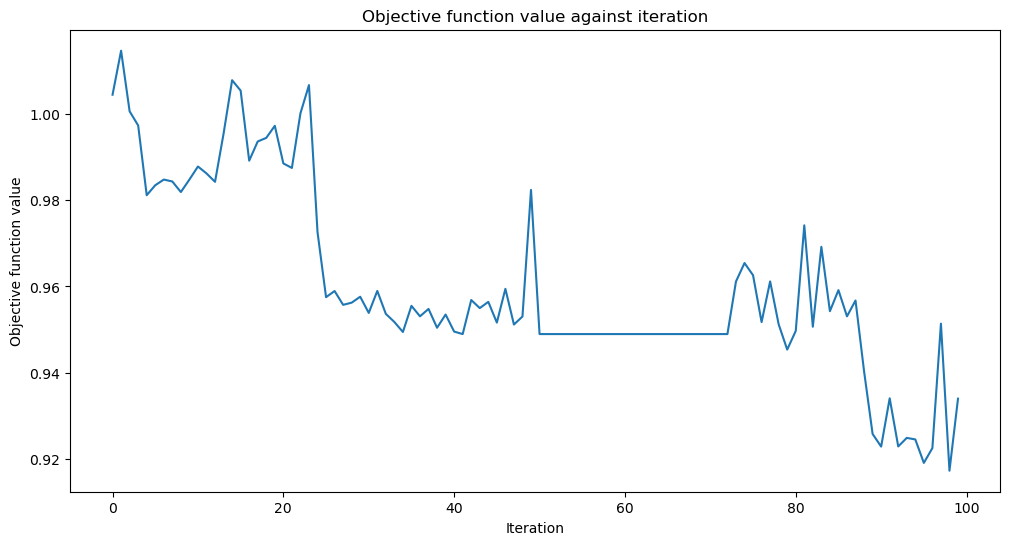

Training time: 4989 seconds
avg_train_score_list = [0.6890625, 0.6787500000000001, 0.6833333333333333, 0.6625000000000001, 0.7203125, 0.7729166666666667, 0.775625, 0.7750000000000001, 0.740625, 0.7533653846153847, 0.7955357142857142, 0.8204166666666666, 0.785546875, 0.8102941176470588, 0.8072916666666667, 0.7700657894736842]

avg_test_score_list = = [0.5625, 0.5599999999999999, 0.6333333333333333, 0.5857142857142857, 0.659375, 0.7277777777777776, 0.7275, 0.7431818181818182, 0.725, 0.7384615384615384, 0.8, 0.7816666666666666, 0.74375, 0.7720588235294118, 0.7972222222222222, 0.761842105263158]

avg_train_mse_list = [0.3109375, 0.32125000000000004, 0.31666666666666665, 0.3375, 0.2796875, 0.22708333333333336, 0.22437499999999994, 0.225, 0.259375, 0.24663461538461537, 0.2044642857142857, 0.17958333333333334, 0.214453125, 0.1897058823529412, 0.19270833333333334, 0.2299342105263158]

avg_train_mse_list = [0.4375, 0.44000000000000006, 0.36666666666666664, 0.4142857142857143, 0.340625, 0.272222

In [29]:
sample_data = 80
avg_train_mse = []
avg_test_mse = []
avg_train_score = []
avg_test_score = []
sample_data_list = []
    
for sample_data in range(80, 400, 20):
    house = house.sample(n=sample_data, replace =True)
    
    data = house.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]].values
    target_price = house.iloc[:, 0].values
    price_label = house.iloc[:, 13].values
    Dict = {'data' : data, 'target_price' : target_price, 'price_label' : price_label}

    Features = Dict['data']
    Labels = Dict['price_label']  # This is for classification

    Target = Dict['price_label']  # This only for Regression
    #data

    
    train_score_list = []
    test_score_list = []
    Train_f1 = []
    Test_f1 = []
    train_mse_list = []
    test_mse_list = []

    for i in range(10):
        #QML_Classification(Dict, Features, Labels)
            
        features = Features  # this need to be properly defined, if your data is not in data and label form split 
        labels = Labels  # it into arrays change this features and label to make it two diff arrays
        features = MinMaxScaler().fit_transform(features)
    
        algorithm_globals.random_seed = numpy.random.randint(100,10000)
        train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
        )

        num_features = features.shape[1]

        feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
        feature_map.decompose()
        """
        def Ansatz_housing(num_features):
            ansatz_custom = QuantumCircuit(num_features)
            j = 0
            for i in range(num_features):
                ansatz_custom.ry(Parameter('θ_' +str(j)), i)
                j += 1
                ansatz_custom.rz(Parameter('θ_' +str(j)), i)
                j += 1
            ansatz_custom.barrier()
        
            ansatz_custom.cx(0,1)
            ansatz_custom.cx(0,3)
            ansatz_custom.cx(0,4)
            ansatz_custom.cx(0,9)
            ansatz_custom.cx(0,10)
            ansatz_custom.cx(2,4)
            ansatz_custom.cx(2,3)
            ansatz_custom.cx(7,6)
            ansatz_custom.barrier()
        
            for i in range(num_features):
                ansatz_custom.ry(Parameter('θ_' +str(j)), i)
                j += 1
                ansatz_custom.rz(Parameter('θ_' +str(j)), i)
                j += 1
            return ansatz_custom 
        """
        ansatz = EfficientSU2(num_qubits=num_features, reps=2)
        #ansatz.decompose()
    
    
        optimizer = COBYLA(maxiter=100)
        sampler = Sampler()
    
        objective_func_vals = []
        plt.rcParams["figure.figsize"] = (12, 6)
    
        def callback_graph(weights, obj_func):
            clear_output(wait=True)
            objective_func_vals.append(obj_func)
            plt.title("Objective function value against iteration")
            plt.xlabel("Iteration")
            plt.ylabel("Objective function value")
            plt.plot(range(len(objective_func_vals)), objective_func_vals)
            plt.show()
        
        vqc = VQC(
        sampler=sampler,
        feature_map=feature_map,
        ansatz=ansatz,
        optimizer=optimizer,
        callback=callback_graph,
        )
    
        objective_func_vals = []
        start = time.time()
        vqc.fit(train_features, train_labels)
        elapsed = time.time() - start
    
        print(f"Training time: {round(elapsed)} seconds")
    
        train_score = vqc.score(train_features, train_labels)
        test_score = vqc.score(test_features, test_labels)
            
        pred_train_features = vqc.predict(train_features)
        pred_test_features = vqc.predict(test_features)

        train_mse = mean_squared_error(train_labels, pred_train_features)
        test_mse = mean_squared_error(test_labels, pred_test_features)
        train_f1 = f1_score(train_labels, pred_train_features, average="weighted")
        test_f1 = f1_score(test_labels, pred_test_features, average="weighted")
        
        train_score_list.append(train_score)
        test_score_list.append(test_score)
        Train_f1.append(train_f1)
        Test_f1.append(test_f1)
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
    
    avg_train_mse.append(np.mean(train_mse_list))
    avg_test_mse.append(np.mean(test_mse_list))
    
    avg_train_score.append(np.mean( train_score_list))
    avg_test_score.append(np.mean(test_score_list))
    sample_data_list.append(sample_data)
    
    #sample_data = sample_data + 40
    
print("avg_train_score_list =", avg_train_score)
print()
print("avg_test_score_list = =", avg_test_score)
print()
print("avg_train_mse_list =", avg_train_mse)
print()
print("avg_train_mse_list =", avg_test_mse)
print()
print("Sample Data Size =", sample_data_list )
    


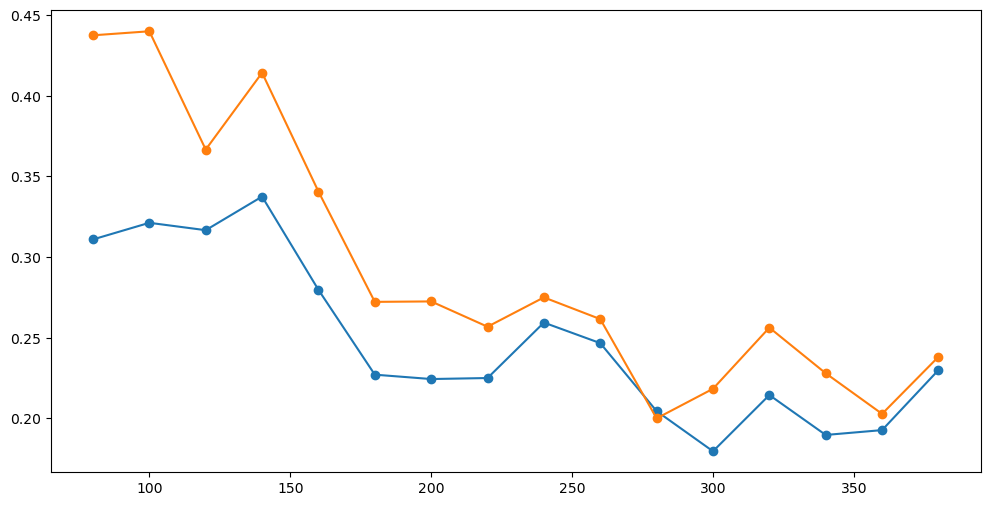

In [36]:
import matplotlib.pyplot as plt
plt.plot(sample_data_list, avg_train_mse, marker="o")
plt.plot(sample_data_list, avg_test_mse, marker="o")


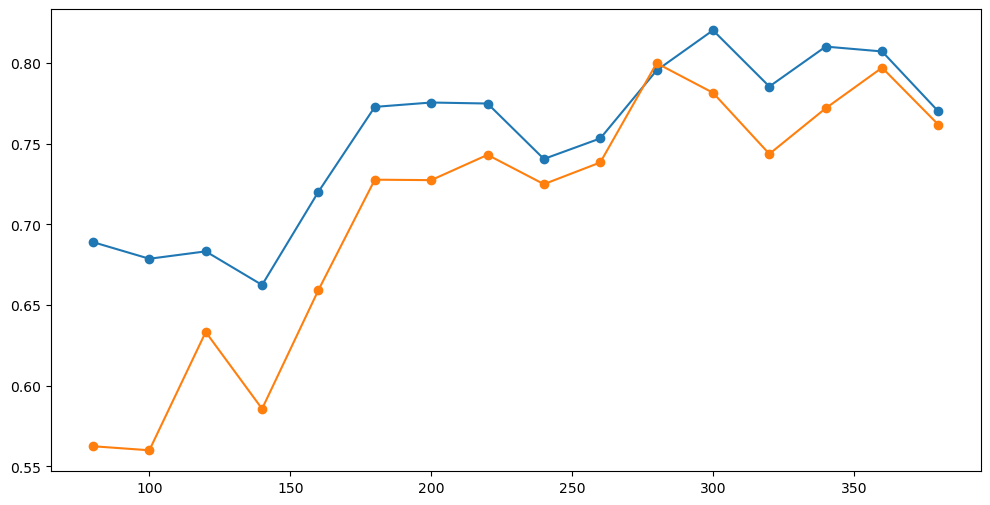

In [34]:
plt.plot(sample_data_list, avg_train_score, marker="o")
plt.plot(sample_data_list, avg_test_score, marker="o")